# Week 2

## Linear Regression

In [81]:
# Linear Regression -> Helps to understand relationship between 2 variables (dependent y and independent x)

# y = b + w x
# b : bias
# w : slope / wieght
# model: models the relationship between x and y

# yhat = 1 - 3 x

# Step 1 : Train

# Step 2 : Forward

In [82]:
import torch

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

def forward(x):
    y = w*x + b
    return y

x = torch.tensor([1.0])

yhat = forward(x)
yhat

tensor([1.], grad_fn=<AddBackward0>)

In [83]:
x = torch.tensor([[1], [2]])

yhat = forward(x)

yhat

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)

In [84]:
from torch.nn import Linear

torch.manual_seed(1)

model = Linear(in_features = 1, out_features = 1)

print(list(model.parameters()))

x = torch.tensor([0.0])

yhat = model(x)

yhat

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


tensor([-0.4414], grad_fn=<ViewBackward0>)

In [85]:
x = torch.tensor([[1.0], [2.0]])

yhat = model(x)

yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

In [86]:
# Custom Modules

import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out


model = LR(1, 1)

model.state_dict()['linear.weight'].data[0] = torch.tensor([[0.5153]])
model.state_dict()['linear.bias'].data[0] = torch.tensor([[-0.4414]])

# we can change this

x = torch.tensor([1.0])

yhat = model(x)
yhat



tensor([0.0739], grad_fn=<ViewBackward0>)

In [87]:
x = torch.tensor([[1.0], [2.0]])

yhat = model(x)

yhat 


tensor([[0.0739],
        [0.5892]], grad_fn=<AddmmBackward0>)

In [88]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.5153]])),
             ('linear.bias', tensor([-0.4414]))])

In [89]:
model.state_dict().keys()


odict_keys(['linear.weight', 'linear.bias'])

In [90]:
model.state_dict().values()

odict_values([tensor([[0.5153]]), tensor([-0.4414])])

### Learning Parameters / Training

In [91]:
# D = {(x1, y1), ....., (xn, yn)}

# Assumption, Noise for Linear Regression is Gaussian

# Loss is a precursor to Cost

In [92]:
# loss is a function of parameter
# Loss is a measure of how good our estimation is

# find minima in the parameter space

In [93]:
# Gradient Descent, LR and Stopping Criteria

# Cost is just average loss so it's still a function of our parameters



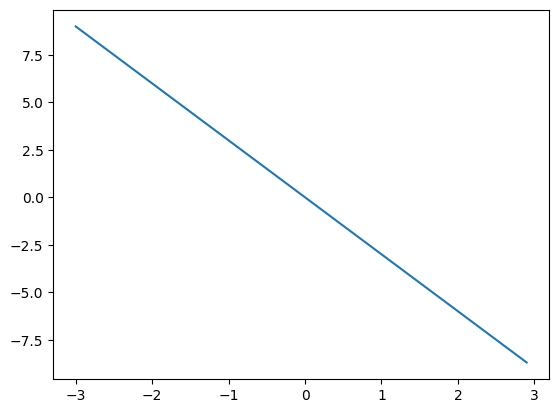

In [94]:
import torch
import matplotlib.pyplot as plt

w = torch.tensor(-10.0, requires_grad = True)

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

plt.plot(X.numpy(), f.numpy())
plt.show()

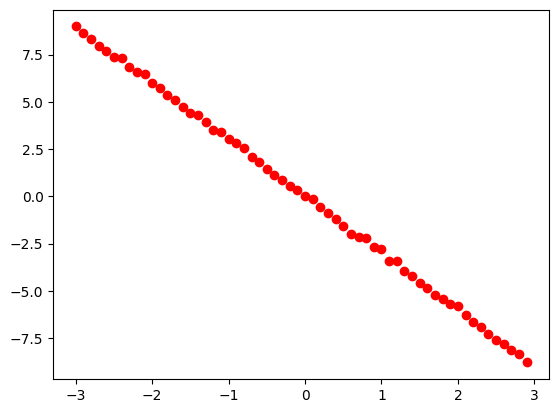

In [95]:
Y = f + 0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [96]:
def forward(x):
    return w*x


def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

lr = 0.1
COST = []
for epoch in range(3):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward() # differentiate loss 

    w.data = w.data - lr*w.grad.data # w.data means the data contained in the variable w
    w.grad.data.zero_() # setting gradient to 0 for the next calculation
    COST.append(loss.item()) # maintaining cost (avg loss)
